# 房价分析 HLM-GWR

In [1]:
library(lme4)
library(lmerTest)
library(GWmodel)
library(dplyr)
library(rgdal)
library(tmap)

载入需要的程辑包：Matrix


载入程辑包：‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step


载入需要的程辑包：maptools

载入需要的程辑包：sp

Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()

载入需要的程辑包：robustbase


载入程辑包：‘robustbase’


The following object is masked from ‘package:lmerTest’:

    carrots


载入需要的程辑包：Rcpp

载入需要的程辑包：spatialreg

载入需要的程辑包：spData

To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`

Welcome to GWmodel version 2.2-6.


载入程辑包：‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


rgdal

## 数据预处理

In [2]:
house.price <- read.csv("house_price_coord.csv") %>%
  filter(housing_use == 1 & floor != "NONE" & lon > 114.1 & lon < 114.5)
house.price$building_type <- factor(house.price$building_type)
house.price$building_structure <- factor(house.price$building_structure)
house.price$decoration_situation <- factor(house.price$decoration_situation)
house.price$transaction_ownership <- factor(house.price$transaction_ownership)
house.price$structure_type <- factor(house.price$structure_type)
house.price$floor <- factor(house.price$floor)
house.price$price <- log(house.price$price)
house.price$charge <- log(house.price$charge)
house.price$building_area <- log(house.price$building_area)
house.price$d_busines4 <- log(house.price$d_busines4 + 1)
house.price$d_green <- log(house.price$d_green + 1)
house.price$d_waterthree <- log(house.price$d_waterthree + 1)
house.price$d_waternew <- log(house.price$d_waternew + 1)
house.price$d_waterselected <- log(house.price$d_waterselected + 1)
house.price$d_high <- log(house.price$d_high)
house.price$d_middle <- log(house.price$d_middle)
house.price$d_subwayonly <- log(house.price$d_subwayonly)
house.price$d_supermarket <- log(house.price$d_asupermarket)
house.price$d_kindergarden <- log(house.price$d_akindergarden)
house.price$d_commonmall <- log(house.price$d_acommonmall)
house.price$d_university <- log(house.price$d_auniversity)
house.price$d_primaryschool <- log(house.price$d_aprimaryschool)
house.price$d_shoppingmall <- log(house.price$d_ashoppingmall)
head(house.price)

,X,id,lon,lat,price,group,building_area,building_type,building_structure,decoration_situation,⋯,d_acommonmall,d_akindergarden,d_asupermarket,group_count,d_supermarket,d_kindergarden,d_commonmall,d_university,d_primaryschool,d_shoppingmall
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,104101066680,114.31,30.5233,9.948652,0,4.443474,塔楼,钢混结构,精装,⋯,0.005164052,0.001446042,0.001854652,44,-6.290058,-6.538925,-5.266034,-4.633394,-5.711257,-5.20265
2,1,104101127856,114.31,30.5233,9.964630,0,3.688379,塔楼,钢混结构,其他,⋯,0.005164052,0.001446042,0.001854652,44,-6.290058,-6.538925,-5.266034,-4.633394,-5.711257,-5.20265
3,2,104100890629,114.31,30.5233,9.920984,0,4.476768,塔楼,钢混结构,精装,⋯,0.005164052,0.001446042,0.001854652,44,-6.290058,-6.538925,-5.266034,-4.633394,-5.711257,-5.20265
4,3,104101117479,114.31,30.5233,9.980958,0,4.742843,塔楼,钢混结构,其他,⋯,0.005164052,0.001446042,0.001854652,44,-6.290058,-6.538925,-5.266034,-4.633394,-5.711257,-5.20265
5,4,104101202944,114.31,30.5233,9.904037,0,3.688379,塔楼,钢混结构,精装,⋯,0.005164052,0.001446042,0.001854652,44,-6.290058,-6.538925,-5.266034,-4.633394,-5.711257,-5.20265
6,5,104100740242,114.31,30.5233,10.001249,0,3.708927,塔楼,钢混结构,其他,⋯,0.005164052,0.001446042,0.001854652,44,-6.290058,-6.538925,-5.266034,-4.633394,-5.711257,-5.20265


In [3]:
house.price.dummy <- house.price
dummy_vars = c("building_type", "building_structure", "decoration_situation", "transaction_ownership", "structure_type", "floor")
for (varn in dummy_vars) {
  value_range <- unique(house.price.dummy[,varn])
  for (value_name in value_range) {
    value_var_name <- paste(varn, value_name, sep = "")
    house.price.dummy[,value_var_name] <- 0
    house.price.dummy[which(house.price.dummy[,varn] == value_name), value_var_name] = 1
  }
}

## HLM-GWR 分析

In [4]:
### HLM
house.hlm.model <- lmer(price ~ building_area + floor高楼层 + 
                        (floor高楼层 | group), 
                       data = house.price.dummy)
performance::r2(house.hlm.model)
performance::aicc(house.hlm.model)

# R2 for Mixed Models

  Conditional R2: 0.908
     Marginal R2: 0.001

ERROR: Error: 'aicc' is not an exported object from 'namespace:performance'


In [5]:
### HLM-GWR
house.hlm.model.coef <- coef(house.hlm.model)$group
house.hlm.model.intercept <- house.hlm.model.coef$`(Intercept)`

In [7]:
house.price.hlmgwr.gwr <- group_by(house.price.dummy, group) %>%
    summarise(price = mean(price), lon = mean(lon), lat = mean(lat), 
              d_waterthree = mean(d_waterthree), charge = mean(charge), d_busines4 = mean(d_busines4), 
              d_aprimaryschool = mean(d_aprimaryschool), d_akindergarden = mean(d_akindergarden)) %>%
    as.data.frame()
house.price.hlmgwr.gwr$hlm <- house.hlm.model.intercept
coordinates(house.price.hlmgwr.gwr) <- ~ lon + lat
proj4string(house.price.hlmgwr.gwr) <- CRS("+proj=longlat +datum=WGS84")

In [8]:
### 参数设置
house.hgr.cfg <- list(
    kernel = "gaussian",
    adaptive = "fixed"
)

In [10]:
house.hlmgwr.model.formula <- hlm ~ d_waterthree + charge + d_busines4 + d_aprimaryschool + d_akindergarden
house.hlmgwr.model.bw <- bw.gwr(house.hlmgwr.model.formula, data = house.price.hlmgwr.gwr, longlat = T, 
                                kernel = house.hgr.cfg$kernel, adaptive = house.hgr.cfg$adaptive == "adaptive")
house.hlmgwr.model <- gwr.basic(house.hlmgwr.model.formula, data = house.price.hlmgwr.gwr, bw = house.hlmgwr.model.bw, longlat = T,
                                kernel = house.hgr.cfg$kernel, adaptive = house.hgr.cfg$adaptive == "adaptive")
house.hlmgwr.model

Fixed bandwidth: 25.86866 CV score: 19.05578 
Fixed bandwidth: 15.99091 CV score: 18.52317 
Fixed bandwidth: 9.886121 CV score: 17.37842 
Fixed bandwidth: 6.113156 CV score: 15.73004 
Fixed bandwidth: 3.781335 CV score: 13.99206 
Fixed bandwidth: 2.340191 CV score: 13.20096 
Fixed bandwidth: 1.449515 CV score: 13.85477 
Fixed bandwidth: 2.890659 CV score: 13.34811 
Fixed bandwidth: 1.999983 CV score: 13.26059 
Fixed bandwidth: 2.550451 CV score: 13.22895 
Fixed bandwidth: 2.210243 CV score: 13.20465 
Fixed bandwidth: 2.420503 CV score: 13.20711 
Fixed bandwidth: 2.290555 CV score: 13.20022 
Fixed bandwidth: 2.259879 CV score: 13.20105 
Fixed bandwidth: 2.309514 CV score: 13.20021 


Warning message in proj4string(data):
“CRS object has comment, which is lost in output”


   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2021-06-12 11:28:05 
   Call:
   gwr.basic(formula = house.hlmgwr.model.formula, data = house.price.hlmgwr.gwr, 
    bw = house.hlmgwr.model.bw, kernel = house.hgr.cfg$kernel, 
    adaptive = house.hgr.cfg$adaptive == "adaptive", longlat = T)

   Dependent (y) variable:  hlm
   Independent variables:  d_waterthree charge d_busines4 d_aprimaryschool d_akindergarden
   Number of data points: 779
   ***********************************************************************
   *                    Results of Global Regression                     *
   ***********************************************************************

   Call:
    lm(formula = formula, data = data)

   Residuals:
     Min       1Q   Median       3Q      Max 
-0.38378 -0.10266 -0.

In [11]:
house.hlmgwr.model.bw

[1] 2.309514

In [14]:
gw.dist(house.price.hlmgwr.gwr@coords[1:2,], house.price.hlmgwr.gwr@coords[1:2,], longlat = T)

0.00000,19.88364
19.88364,0.00000


In [17]:
house.price.hlmgwr.gwr@data[1:2,]

,group,price,d_waterthree,charge,d_busines4,d_aprimaryschool,d_akindergarden,hlm
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,9.946305,0.02355637,0.4121097,0.00000000,0.003308512,0.001446042,10.053404
2,1,9.495304,0.07269090,0.1823216,0.05866268,0.014061704,0.054244330,9.612333


In [18]:
writeOGR(house.price.hlmgwr.gwr, "Data", "house_price_hlmgwr_gwr", "ESRI Shapefile")

ERROR: Error in writeOGR(house.price.hlmgwr.gwr, "Data", "house_price_hlmgwr_gwr", : layer exists, use a new layer name


In [133]:
gwr.merge.fields <- c("d_waterthree", "charge", "d_busines4", "d_aprimaryschool", "d_akindergarden")
hlm.merge.fields <- c("building_area", "floor高楼层")
coef.merge.fields <- c("Intercept", hlm.merge.fields, gwr.merge.fields)
house.model.hlmgwr.merge.coef <- cbind(
    house.hlmgwr.model$SDF@coords,
    Intercept = house.hlmgwr.model$SDF@data[,c("Intercept")],
    house.hlm.model.coef[,hlm.merge.fields], 
    house.hlmgwr.model$SDF@data[,gwr.merge.fields]
)
colnames(house.model.hlmgwr.merge.coef) <- c("lon", "lat", coef.merge.fields)
coordinates(house.model.hlmgwr.merge.coef) <- ~ lon + lat
proj4string(house.model.hlmgwr.merge.coef) <- CRS("+proj=longlat +datum=WGS84")
house.hlmgwr.coef.full <- house.model.hlmgwr.merge.coef@data
rownames(house.hlmgwr.coef.full) <- rownames(house.hlm.model.coef)

In [134]:
house.price.hlmgwr <- cbind(
    y_hat = 0,
    Intercept = 1,
    house.price.dummy[, c("price", "group", hlm.merge.fields, gwr.merge.fields)]
)
for (g in unique(house.price.hlmgwr$group)) {
    group.data <- filter(house.price.hlmgwr, group == g)[, coef.merge.fields] %>% as.matrix()
    group.beta <- house.hlmgwr.coef.full[as.character(g), coef.merge.fields] %>% as.matrix()
    house.price.hlmgwr[which(house.price.hlmgwr$group == g), "y_hat"] <- group.data %*% t(group.beta)
}
head(house.price.hlmgwr)

,y_hat,Intercept,price,group,building_area,floor高楼层,d_waterthree,charge,d_busines4,d_aprimaryschool,d_akindergarden
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10.04492,1,9.948652,0,4.443474,0,0.02355637,0.4121097,0,0.003308512,0.001446042
2,10.05377,1,9.964630,0,3.688379,1,0.02355637,0.4121097,0,0.003308512,0.001446042
3,10.03448,1,9.920984,0,4.476768,1,0.02355637,0.4121097,0,0.003308512,0.001446042
4,10.03759,1,9.980958,0,4.742843,0,0.02355637,0.4121097,0,0.003308512,0.001446042
5,10.05377,1,9.904037,0,3.688379,1,0.02355637,0.4121097,0,0.003308512,0.001446042
6,10.06288,1,10.001249,0,3.708927,0,0.02355637,0.4121097,0,0.003308512,0.001446042


In [135]:
house.price.hlmgwr$residual <- house.price.hlmgwr$price - house.price.hlmgwr$y_hat
house.price.hlmgwr.r2 <- 1 - sum(house.price.hlmgwr$residual^2) / sum((house.price.hlmgwr$price - mean(house.price.hlmgwr$price))^2)
house.price.hlmgwr.r2

[1] 0.7802445

## 制图

In [144]:
### 导入底图
wuhan <- readOGR("Map/WuhanDistinct.shp")

OGR data source with driver: ESRI Shapefile 
Source: "/home/hpdell/文档/House-HLM-GWR/Map/WuhanDistinct.shp", layer: "WuhanDistinct"
with 13 features
It has 6 fields
Integer64 fields read as strings:  FID_市界 FID_Wuhan 


In [180]:
### 基本图层
house.figure.base <- tm_layout(legend.outside = F, legend.position = c(0, 0), legend.frame = "white", outer.margins = 0, frame = FALSE) +
    tm_shape(wuhan) + tm_borders("black", lwd = 1) +
    tm_compass(position = c(0, 1), just = c(0, 1)) +
    tm_scale_bar(position = c(1, 0), just = c(1, 0))

### 回归系数

In [140]:
### 生成制图数据
house.price.draw <- house.model.hlmgwr.merge.coef
names(house.price.draw@data) <- c("Intercept", "BuildingArea", "Floor.High", "d.Water", 
                                  "Fee", "d.Commercial", "d.PrimarySchool", "d.Kindergarten")
head(house.price.draw)

,Intercept,BuildingArea,Floor.High,d.Water,Fee,d.Commercial,d.PrimarySchool,d.Kindergarten
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10.057209,-0.02445893,-0.009618413,3.334609,0.10122374,2.9623553,-5.684980,-3.504809
2,9.891212,-0.02445893,-0.027184974,4.480433,0.12340918,-5.5597083,-2.518156,-5.014211
3,9.975042,-0.02445893,-0.021176674,1.550831,0.13895218,-1.3612202,-6.743581,-5.203501
4,9.552198,-0.02445893,-0.027440407,3.417092,0.06363591,-1.0928985,-1.169615,-3.306119
5,10.138567,-0.02445893,0.038644282,-2.739257,0.11870268,26.6770276,18.142234,-13.517468
6,9.590559,-0.02445893,-0.010911086,2.517215,0.06625462,-0.8697368,-1.851770,-2.779103


In [ ]:
# house.figure.base + tm_shape(house.price.draw, is.master = T) + 
#     tm_symbols(col = "d.Water", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
#                legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
#                style = "pretty", breaks = with(house.price.draw@data, c(min(d.Water), seq(0.1, 0.3, by = 0.05), max(d.Water))))

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


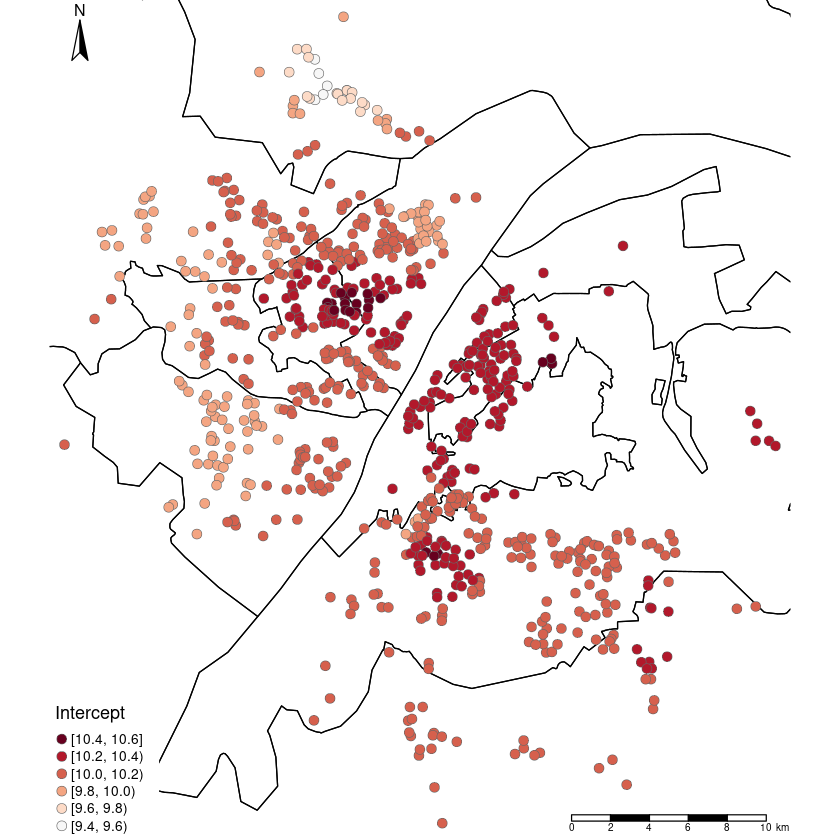

In [210]:
house.figure.base + tm_shape(house.price.draw, is.master = T) + 
    tm_symbols(col = "Intercept", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "pretty", breaks = with(house.price.draw@data, c(min(Intercept), seq(0.1, 0.3, by = 0.05), max(Intercept)))) 

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


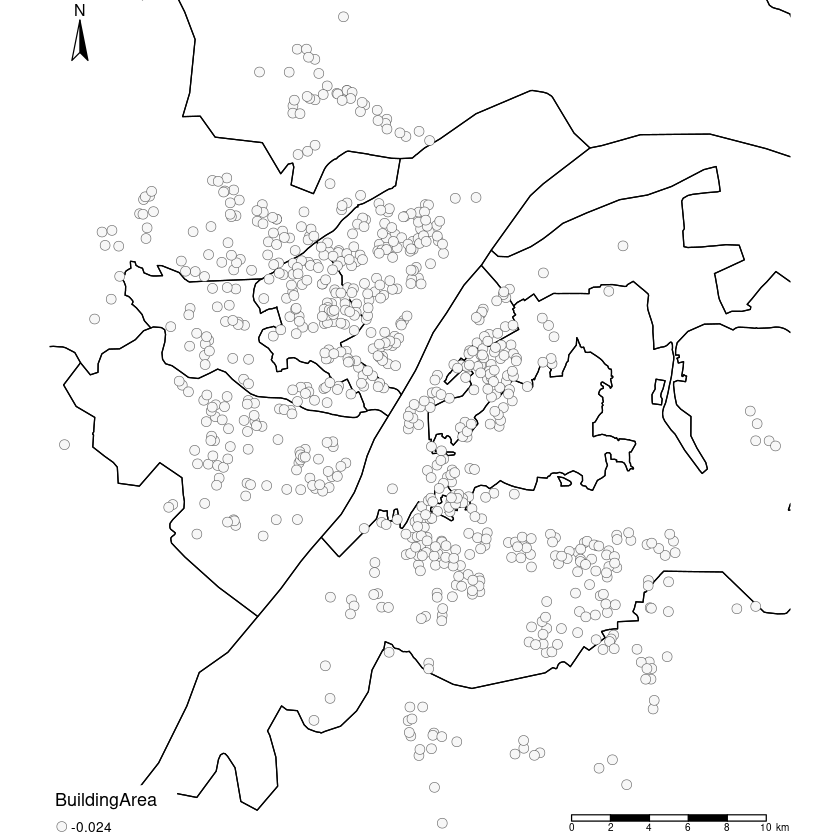

In [204]:
house.figure.base + tm_shape(house.price.draw, is.master = T) + 
    tm_symbols(col = "BuildingArea", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "pretty", breaks = with(house.price.draw@data, c(min(BuildingArea), seq(0.1, 0.3, by = 0.05), max(BuildingArea))))

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


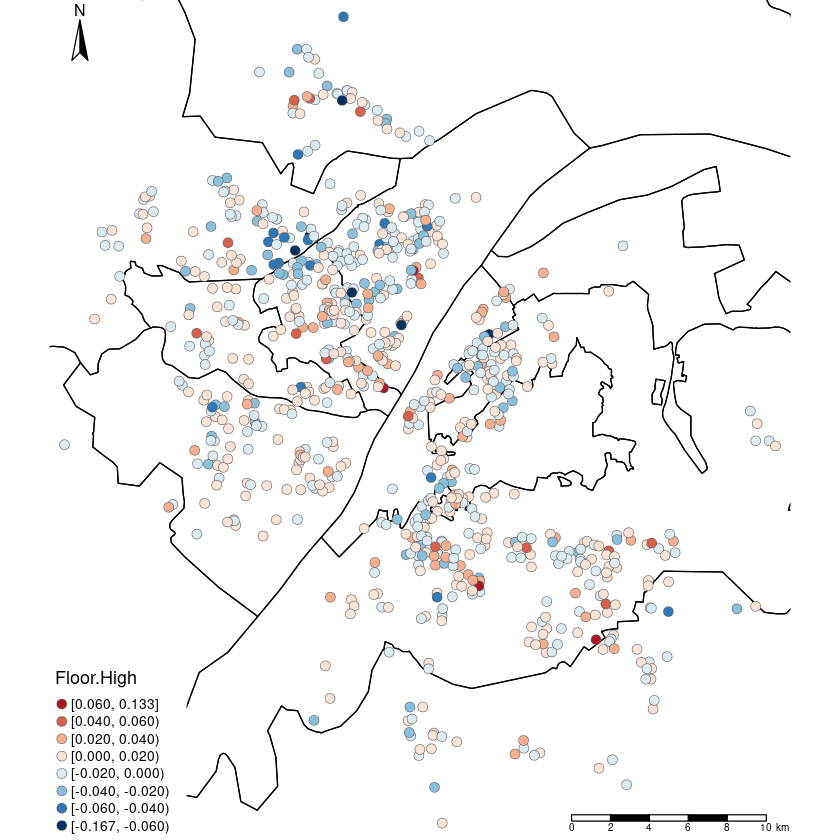

In [206]:
house.figure.base + tm_shape(house.price.draw, is.master = T) + 
    tm_symbols(col = "Floor.High", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = with(house.price.draw@data, c(min(Floor.High), seq(-0.06, 0.06, by = 0.02), max(Floor.High))))

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


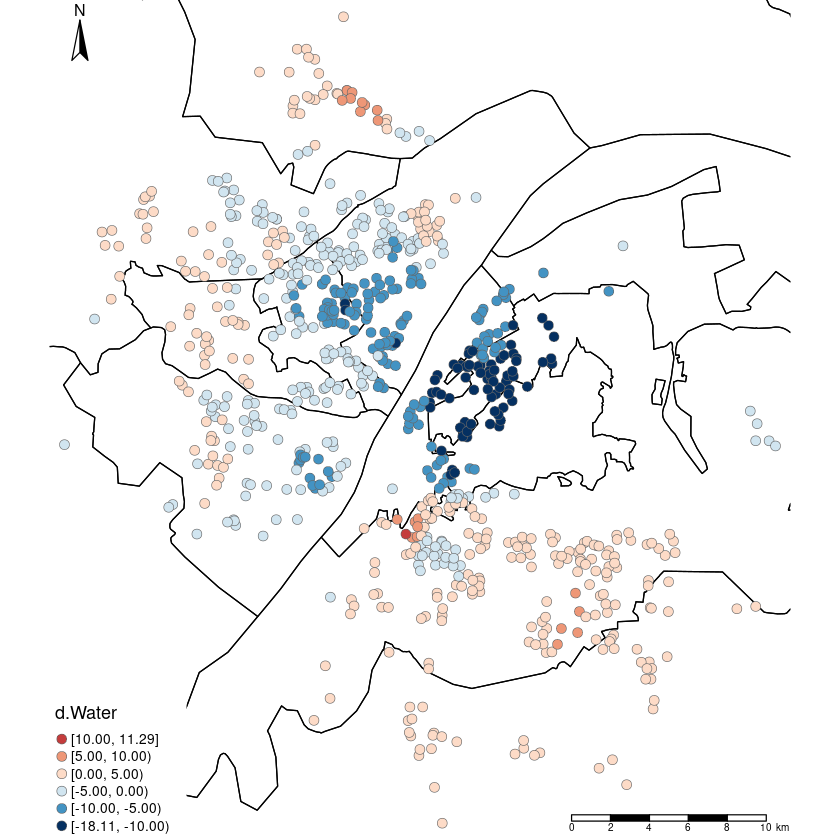

In [208]:
house.figure.base + tm_shape(house.price.draw, is.master = T) + 
    tm_symbols(col = "d.Water", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = with(house.price.draw@data, c(min(d.Water), seq(-10, 10, by = 5), max(d.Water))))

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


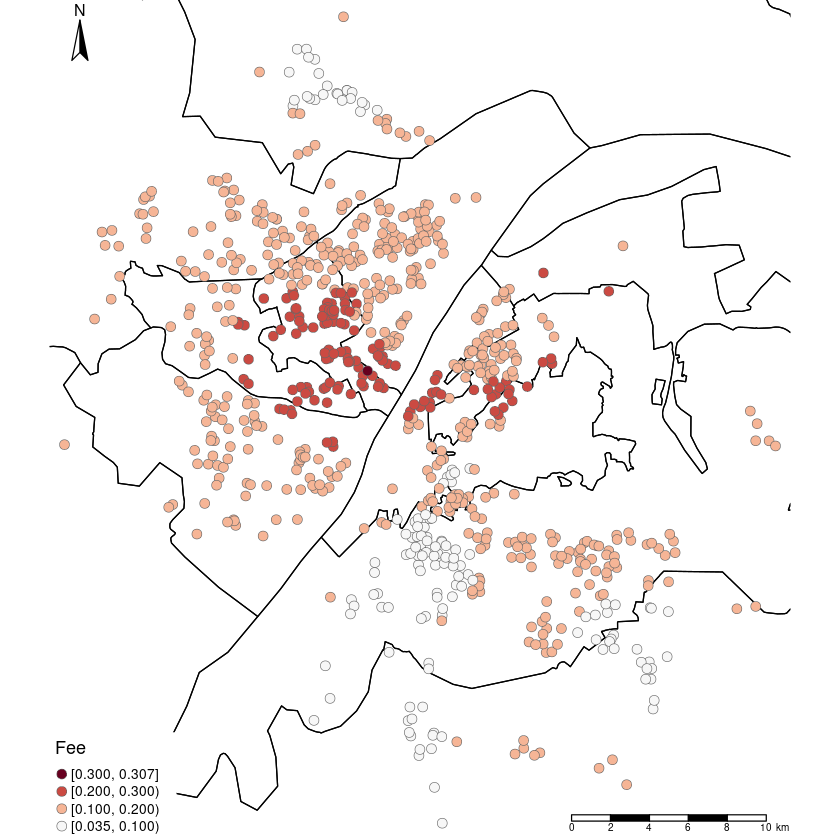

In [221]:
house.figure.base + tm_shape(house.price.draw, is.master = T) + 
    tm_symbols(col = "Fee", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = with(house.price.draw@data, c(min(Fee), seq(0.1, 0.3, by = 0.1), max(Fee))))

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


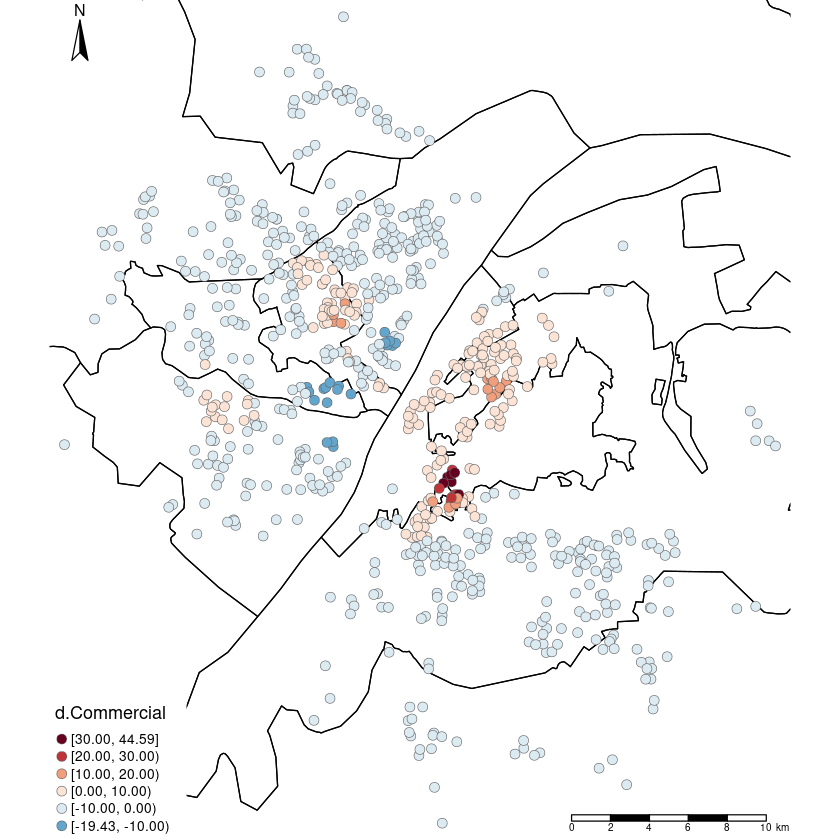

In [189]:
house.figure.base + tm_shape(house.price.draw, is.master = T) + 
    tm_symbols(col = "d.Commercial", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = with(house.price.draw@data, c(min(d.Commercial), seq(-10, 30, by = 10), max(d.Commercial))))

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


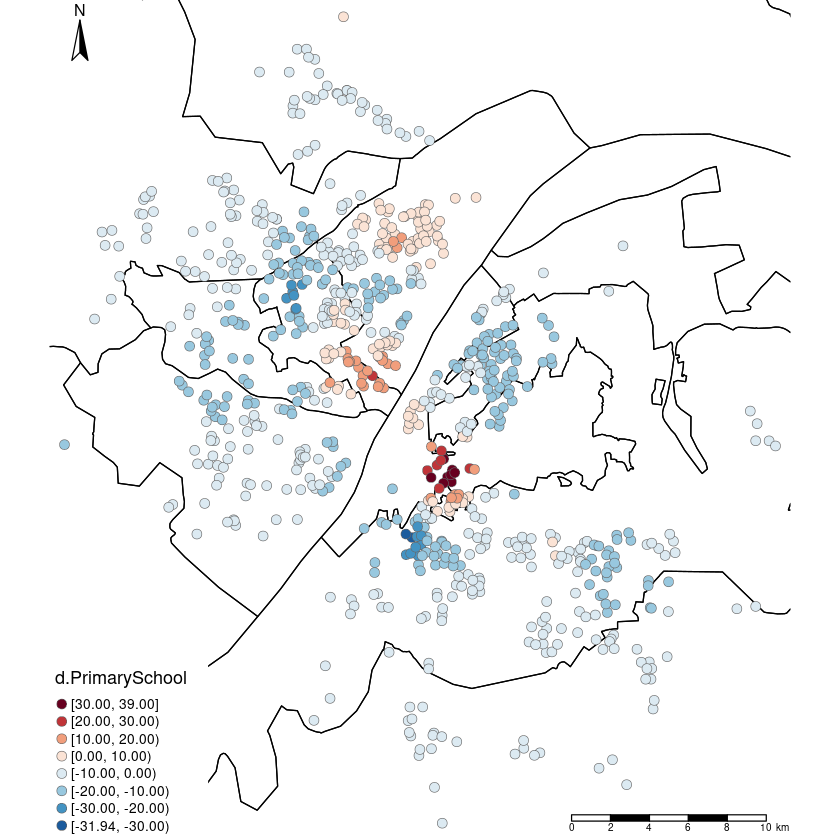

In [181]:
house.figure.base + tm_shape(house.price.draw, is.master = T) + 
    tm_symbols(col = "d.PrimarySchool", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = with(house.price.draw@data, c(min(d.PrimarySchool), seq(-30, 30, by = 10), max(d.PrimarySchool))))

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


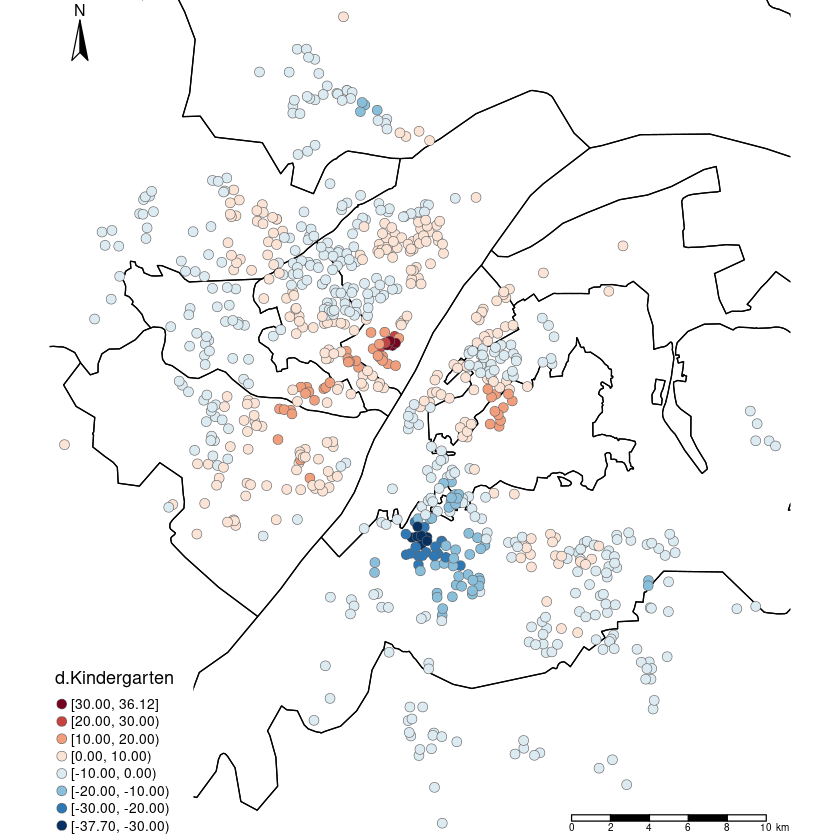

In [184]:
house.figure.base + tm_shape(house.price.draw, is.master = T) + 
    tm_symbols(col = "d.Kindergarten", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = with(house.price.draw@data, c(min(d.Kindergarten), seq(-30, 30, by = 10), max(d.Kindergarten))))

In [222]:
figure.coef.configures <- list(
    "Intercept" = list(style = "pretty", breaks = c()), 
    "BuildingArea" = list(style = "pretty", breaks = c()), 
    "Floor.High" = list(style = "fixed", breaks = with(house.price.draw@data, c(min(Floor.High), seq(-0.06, 0.06, by = 0.02), max(Floor.High)))), 
    "d.Water" = list(style = "fixed", breaks = with(house.price.draw@data, c(min(d.Water), seq(-10, 10, by = 5), max(d.Water)))), 
    "Fee" = list(style = "fixed", breaks = with(house.price.draw@data, c(min(Fee), seq(0.1, 0.3, by = 0.1), max(Fee)))), 
    "d.Commercial" = list(style = "fixed", breaks = with(house.price.draw@data, c(min(d.Commercial), seq(-10, 30, by = 10), max(d.Commercial)))), 
    "d.PrimarySchool" = list(style = "fixed", breaks = with(house.price.draw@data, c(min(d.PrimarySchool), seq(-30, 30, by = 10), max(d.PrimarySchool)))), 
    "d.Kindergarten" = list(style = "fixed", breaks = with(house.price.draw@data, c(min(d.Kindergarten), seq(-30, 30, by = 10), max(d.Kindergarten))))
)

In [223]:
figure.coef.names <- c("Intercept", "d.Water", "Fee", "d.Commercial", "d.PrimarySchool", 
                       "d.Kindergarten", "BuildingArea", "Floor.High")
for (figure.coef.current in figure.coef.names) {
    figure.coef.plot <- house.figure.base + tm_shape(house.price.draw, is.master = T) + 
        tm_symbols(col = figure.coef.current, size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
                   legend.col.reverse = T, legend.format = list(scientific = T, format = "f"), stretch.palette = FALSE, 
                   style = figure.coef.configures[[figure.coef.current]]$style, breaks = figure.coef.configures[[figure.coef.current]]$breaks)
    tmap_save(figure.coef.plot, sprintf("Figure/HLMGWR/HGR-coef-%s-%s-%s.png", house.hgr.cfg$kernel, house.hgr.cfg$adaptive, figure.coef.current), width = 6, height = 6.2, family = "serif")
}

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”
Map saved to /home/hpdell/文档/House-HLM-GWR/Figure/HLMGWR/HGR-coef-gaussian-adaptive-Intercept.png

Resolution: 1800 by 1860 pixels

Size: 6 by 6.2 inches (300 dpi)

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”
Map saved to /home/hpdell/文档/House-HLM-GWR/Figure/HLMGWR/HGR-coef-gaussian-adaptive-d.Water.png

Resolution: 1800 by 1860 pixels

Size: 6 by 6.2 inches (300 dpi)

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”
Map saved to /home/hpdell/文档/House-HLM-GWR/Figure/HLMGWR/HGR-coef-gaussian-adaptive-Fee.png

Resolution: 1800 by 1860 pixels

Size: 6 by 6.2 inches (300 dpi)

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”
Map saved to /home/hpdell/文档/House-HLM-GWR/Figure/HLMGWR/HGR-coef-gaussian-adaptive-d.Commercial.png

Resolution: 1800 by 1860 pixels

Size: 6 by 6.2